**Important**: Click on "*Kernel*" > "*Restart Kernel and Clear All Outputs*" *before* reading this chapter in [JupyterLab <img height="12" style="display: inline-block" src="static/link_to_jp.png">](https://jupyterlab.readthedocs.io/en/stable/) (e.g., in the cloud on [MyBinder <img height="12" style="display: inline-block" src="static/link_to_mb.png">](https://mybinder.org/v2/gh/webartifex/intro-to-python/master?urlpath=lab/tree/09_mappings_00_content.ipynb))

# Chapter 9: Mappings & Sets

While [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb) focuses on one special kind of *collection* types, namely *sequences*, this chapter introduces two more kinds: **Mappings** and **sets**. Both are presented in this chapter as they share the *same* underlying implementation.

The `dict` type (cf, [documentation <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict)) introduced in the next section is an essential part in a data scientist's toolbox for two reasons: First, Python employs `dict` objects basically "everywhere" internally. Second, after the many concepts involving *sequential* data, *mappings* provide a different perspective on data and enhance our general problem solving skills.

## The `dict` Type

A *mapping* is a one-to-one correspondence from a set of **keys** to a set of **values**. In other words, a *mapping* is a *collection* of **key-value pairs**, also called **items** for short.

In the context of mappings, the term *value* has a meaning different from the *value* every object has: In the "bag" analogy from [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Value-/-"Meaning"), we describe an object's value to be the semantic meaning of the $0$s and $1$s it contains. Here, the terms *key* and *value* mean the *role* an object takes within a mapping. Both, *keys* and *values*, are *objects* on their own with distinct *values*.

Let's continue with an example. To create a `dict` object, we commonly use the literal notation, `{..: .., ..: .., ...}`, and list all the items. `to_words` below maps the `int` objects `0`, `1`, and `2` to their English word equivalents, `"zero"`, `"one"`, and `"two"`, and `from_words` does the opposite. A stylistic side note: Pythonistas often expand `dict` or `list` definitions by writing each item or element on a line on their own. Also, the commas `,` after the respective *last* items, `2: "two"` and `"two": 2`, are *not* a mistake although they *may* be left out. Besides easier reading, such a style has technical advantages that we do not go into detail about here (cf., [source <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/dev/peps/pep-0008/#when-to-use-trailing-commas)).

In [1]:
to_words = {
    0: "zero",
    1: "one",
    2: "two",
}

In [2]:
from_words = {
    "zero": 0,
    "one": 1,
    "two": 2,
}

As before, `dict` objects are objects on their own: They have an identity, a type, and a value.

In [3]:
id(to_words)

140024292070576

In [4]:
type(to_words)

dict

In [5]:
to_words

{0: 'zero', 1: 'one', 2: 'two'}

In [6]:
id(from_words)

140024292122864

In [7]:
type(from_words)

dict

In [8]:
from_words

{'zero': 0, 'one': 1, 'two': 2}

The built-in [dict() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-dict) constructor gives us an alternative way to create a `dict` object. It is versatile and can be used in different ways.

First, we may pass it any *mapping* type, for example, a `dict` object, to obtain a *new* `dict` object. That is the easiest way to obtain a *shallow* copy of a `dict` object or convert any other mapping object into a `dict` one.

In [9]:
dict(from_words)

{'zero': 0, 'one': 1, 'two': 2}

Second, we may pass it a *finite* `iterable` providing *iterables* with *two* elements each. So, both of the following two code cells work: A `list` of `tuple` objects, or a `tuple` of `list` objects. More importantly, we could use an *iterator*, for example, a `generator` object, that produces the inner iterables "on the fly."

In [10]:
dict([("zero", 0), ("one", 1), ("two", 2)])

{'zero': 0, 'one': 1, 'two': 2}

In [11]:
dict((["zero", 0], ["one", 1], ["two", 2]))

{'zero': 0, 'one': 1, 'two': 2}

Lastly, [dict() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-dict) may also be called with *keyword* arguments: The keywords become the keys and the arguments the values.

In [12]:
dict(zero=0, one=1, two=2)

{'zero': 0, 'one': 1, 'two': 2}

### Nested Data

Often, `dict` objects occur in a nested form and combined with other collection types, such as `list` or `tuple` objects, to model more complex entities "from the real world."

The reason for this popularity is that many modern [ReST APIs <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Representational_state_transfer#Applied_to_Web_services) on the internet (e.g., [Google Maps API](https://cloud.google.com/maps-platform/), [Yelp API](https://www.yelp.com/developers/documentation/v3), [Twilio API](https://www.twilio.com/docs/usage/api)) provide their data in the popular [JSON <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/JSON) format, which looks almost like a combination of `dict` and `list` objects in Python. 

The `people` example below models three groups of people: `"mathematicians"`, `"physicists"`, and `"programmers"`. Each person may have an arbitrary number of email addresses. In the example, [Leonhard Euler <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Leonhard_Euler) has not lived long enough to get one whereas [Guido <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Guido_van_Rossum) has more than one.

`people` makes many implicit assumptions about the structure of the data. For example, there are a [one-to-many <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/One-to-many_%28data_model%29) relationship between a person and their email addresses and a [one-to-one <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/One-to-one_%28data_model%29) relationship between each person and their name.

In [13]:
people = {
    "mathematicians": [
        {
            "name": "Gilbert Strang",
            "emails": ["gilbert@mit.edu"],
        },
        {
            "name": "Leonhard Euler",
            "emails": [],
        },
    ],
    "physicists": [],
    "programmers": [
        {
            "name": "Guido",
            "emails": ["guido@python.org", "guido@dropbox.com"],
        },
    ],
}

The literal notation of such a nested `dict` object may be hard to read ...

In [14]:
people

{'mathematicians': [{'name': 'Gilbert Strang', 'emails': ['gilbert@mit.edu']},
  {'name': 'Leonhard Euler', 'emails': []}],
 'physicists': [],
 'programmers': [{'name': 'Guido',
   'emails': ['guido@python.org', 'guido@dropbox.com']}]}

... but the [pprint <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/pprint.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) provides a [pprint() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/pprint.html#pprint.pprint) function for "pretty printing."

In [15]:
from pprint import pprint

In [16]:
pprint(people, indent=1, width=60)

{'mathematicians': [{'emails': ['gilbert@mit.edu'],
                     'name': 'Gilbert Strang'},
                    {'emails': [],
                     'name': 'Leonhard Euler'}],
 'physicists': [],
 'programmers': [{'emails': ['guido@python.org',
                             'guido@dropbox.com'],
                  'name': 'Guido'}]}


### Hash Tables & (Key) Hashability

In [Chapter 0 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/00_intro_00_content.ipynb#Isn't-C-a-lot-faster?), we argue that a major advantage of using Python is that it takes care of the memory managment for us. In line with that, we have never talked about the C level implementation thus far in the book. However, the `dict` type, among others, exhibits some behaviors that may seem "weird" for a beginner. To build some intuition, we describe the underlying implementation details on a conceptual level.

The first unintuitive behavior is that we may *not* use a *mutable* object as a key. That results in a `TypeError`.

In [17]:
{
    ["zero", "one"]: [0, 1],
}

TypeError: unhashable type: 'list'

Similarly surprising is that items with the *same* key get merged together. The resulting `dict` object keeps the position of the *first* mention of the `"zero"` key while only the *last* mention of the corresponding values, `999`, survives.

In [18]:
{
    "zero": 0,
    "one": 1,
    "two": 2,
    "zero": 999,  # to illustrate a point
}

{'zero': 999, 'one': 1, 'two': 2}

The reason for that is that the `dict` type is implemented with so-called [hash tables <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Hash_table).

Conceptually, when we create a *new* `dict` object, Python creates a "bag" in memory that takes significantly more space than needed to store the references to all the key and value objects. This bag is a **contiguous array** similar to the `list` type's implementation. Whereas in the `list` case the array is divided into equally sized *slots* capable of holding *one* reference, a `dict` object's array is divided into equally sized **buckets** with enough space to store *two* references each: One for an item's key and one for the mapped value. The buckets are labeled with *index* numbers. Because Python knows how wide each bucket, it can jump directly into *any* bucket by calculating its *offset* from the start.

The figure below visualizes how we should think of hash tables. An empty `dict` object, created with the literal `{}`, still takes a lot of memory: It is essentially one big, contiguous, and empty table.

|  Bucket |  0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |
|  :---:  |:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **Key** |*...*|*...*|*...*|*...*|*...*|*...*|*...*|*...*|
|**Value**|*...*|*...*|*...*|*...*|*...*|*...*|*...*|*...*|

To insert a key-value pair, the key must be translated into a bucket's index.

As the first step to do so, the built-in [hash() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#hash) function maps any **hashable** object to its **hash value**, a long and "random" `int` number, similar to the ones returned by the built-in [id() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#id) function. This hash value is a *summary* of all the $0$s and $1$s inside the object.

According to the official [glossary <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/glossary.html#term-hashable), an object is hashable *only if* "it has a hash value which *never* changes during its *lifetime*." So, hashability implies immutability! Without this formal requirement an object may end up in *different* buckets depending on its current value. As the name of the `dict` type (i.e., "dictionary") suggests, a primary purpose of it is to insert objects and look them up later on. Without a *unique* bucket, this is of course not doable. The exact logic behind [hash() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#hash) is beyond the scope of this book.

Let's calculate the hash value of `"zero"`, an immutable `str` object. Hash values have *no* semantic meaning. Also, every time we re-start Python, we see *different* hash values for the *same* objects. That is a security measure, and we do not go into the technicalities here (cf. [source <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/using/cmdline.html#envvar-PYTHONHASHSEED)).

In [19]:
hash("zero")

2513450610271817024

For numeric objects, we can sometimes predict the hash values. However, we must *never* interpret any meaning into them.

In [20]:
hash(0)

0

In [21]:
hash(0.0)

0

The [glossary <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/glossary.html#term-hashable) states a second requirement for hashability, namely that "objects which *compare equal* must have the *same* hash value." The purpose of this is to ensure that if we put, for example, `1` as a key in a `dict` object, we can look it up later with `1.0`. In other words, we can look up keys by their object's semantic value. The converse statement does *not* hold: Two objects *may* (accidentally) have the *same* hash value and *not* compare equal. However, that rarely happens.

In [22]:
1 == 1.0

True

In [23]:
hash(1) == hash(1.0)

True

Because `list` objects are not immutable, they are *never* hashable, as indicated by the `TypeError`.

In [24]:
hash(["zero", "one"])

TypeError: unhashable type: 'list'

If we need keys composed of several objects, we can use `tuple` objects instead.

In [25]:
hash(("zero", "one"))

4408973713070187748

There is no such restiction on objects inserted into `dict` objects as *values*.

In [26]:
{
    ("zero", "one"): [0, 1],
}

{('zero', 'one'): [0, 1]}

After obtaining the key object's hash value, Python must still convert that into a bucket index. We do not cover this step in technical detail but provide a conceptual description of it.

The `buckets()` function below shows how we can obtain indexes from the binary representation of a hash value by simply extracting its least significant `bits` and interpreting them as index numbers. Alternatively, the hash value may also be divided with the `%` operator by the number of available buckets. We show this idea in the `buckets_alt()` function that takes the number of buckets, `n_buckets`, as its second argument.

In [27]:
def buckets(mapping, *, bits):
    """Calculate the bucket indices for a mapping's keys."""
    for key in mapping:  # cf., next section for details on looping
        hash_value = hash(key)
        binary = bin(hash_value)
        address = binary[-bits:]
        bucket = int("0b" + address, base=2)
        print(key, hash_value, "0b..." + binary[-8:], address, bucket, sep="\t")

In [28]:
def buckets_alt(mapping, *, n_buckets):
    """Calculate the bucket indices for a mapping's keys."""
    for key in mapping:  # cf., next section for details on looping
        hash_value = hash(key)
        bucket = hash_value % n_buckets
        print(key, hash_value, bucket, sep="\t")

With an infinite number of possible keys being mapped to a limited number of buckets, there is a realistic chance that two or more keys end up in the *same* bucket. That is called a **hash collision**. In such cases, Python uses a perturbation rule to rearrange the bits, and if the corresponding next bucket is empty, places an item there. Then, the nice offsetting logic from above breaks down and Python needs more time on average to place items into a hash table or look them up. The remedy is to use a bigger hash table as then the chance of collisions decreases. Python does all that for us in the background, and the main cost we pay for that is a *high* memory usage of `dict` objects in general.

Because keys with the *same* semantic value have the *same* hash value, they end up in the *same* bucket. That is why the item that gets inserted last *overwrites* all previously inserted items whose keys compare equal, as we saw with the two `"zero"` keys above.

Thus, to come up with indexes for 4 buckets, we need to extract 2 bits from the hash value (i.e., $2^2 = 4$).

In [29]:
buckets(from_words, bits=2)

zero	2513450610271817024	0b...01000000	00	0
one	-153603400453665003	0b...11101011	11	3
two	1981459398511907500	0b...10101100	00	0


In [30]:
buckets_alt(from_words, n_buckets=4)

zero	2513450610271817024	0
one	-153603400453665003	1
two	1981459398511907500	0


Similarly, 3 bits provide indexes for 8 buckets (i.e., $2^3 = 8$) ...

In [31]:
buckets(from_words, bits=3)

zero	2513450610271817024	0b...01000000	000	0
one	-153603400453665003	0b...11101011	011	3
two	1981459398511907500	0b...10101100	100	4


In [32]:
buckets_alt(from_words, n_buckets=8)

zero	2513450610271817024	0
one	-153603400453665003	5
two	1981459398511907500	4


... while 4 bits do so for 16 buckets (i.e., $2^4 = 16$).

In [33]:
buckets(from_words, bits=4)

zero	2513450610271817024	0b...01000000	0000	0
one	-153603400453665003	0b...11101011	1011	11
two	1981459398511907500	0b...10101100	1100	12


In [34]:
buckets_alt(from_words, n_buckets=16)

zero	2513450610271817024	0
one	-153603400453665003	5
two	1981459398511907500	12


Python allocates the memory for a `dict` object's hash table according to some internal heuristics: Whenever a hash table is roughly 2/3 full, it creates a *new* one with twice the space, and re-inserts all items, one by one, from the *old* one. So, during its lifetime, a `dict` object may have several hash tables.

Although hash tables seem quite complex at first sight, they help us to make certain operations very fast as we see further below.

### Mappings are Collections without Predictable Order

In [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#Collections-vs.-Sequences), we see how a *sequence* is a special kind of a *collection*, and that *collections* can be described as
- *iterable*
- *containers*
- with a *finite* number of elements.

The `dict` type is another *collection* type. So, it has the three properties as well.

For example, we may pass `to_words` or `from_words` to the built-in [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) function to obtain the number of *items* they contain. In the terminology of the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html), both are `Sized` objects.

In [35]:
len(to_words)

3

In [36]:
len(from_words)

3

Also, `dict` objects may be looped over, for example, with the `for` statement. So, in the terminology of the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module, they are `Iterable` objects.

For technical reasons, we must *not* rely on the iteration order to be *predictable* in any form until Python 3.7 in 2018. Looping over the *same* `dict` objects multiple times during its lifetime could result in *different* iteration orders every time. That behavior is intentional as `dict` objects are optimized for use cases where order does not matter. Starting with Python 3.7, `dict` objects remember the order in that items are *inserted* (cf., [Python 3.7 release notes <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/downloads/release/python-370/)).

Because of that, the order in the two `for`-loops below is the *same* as in the *source code* that defines `to_words` and `from_words` above. In that sense, it is "*predictable*." However, if we fill `dict` objects with data from real-world sources, that kind of predictability is not helpful as such data are not written as source code, and, thus, we consider the order of items in `dict` objects to be *unpredictable*.

In [37]:
!python --version  # the order in the for-loops is predictable only for Python 3.7 or higher

Python 3.7.4


By convention, iteration goes over the *keys* in the `dict` object only. The "*Dictionary Methods*" section below shows how to loop over the *items* or the *values* instead.

In [38]:
for number in to_words:
    print(number)

0
1
2


In [39]:
for word in from_words:
    print(word)

zero
one
two


Without a predictable *forward* order, `dict` objects are not *reversible* either. So, passing a `dict` object to the [reversed() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#reversed) built-in raises a `TypeError`. In terminology of the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module, they are *no* `Reversible` objects.

In [40]:
for number in reversed(to_words):
    print(number)

TypeError: 'dict' object is not reversible

In [41]:
for word in reversed(from_words):
    print(word)

TypeError: 'dict' object is not reversible

Of course, we could use the built-in [sorted() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#sorted) function to loop over, for example, `from_words` in a *predictable* order. However, that creates a temporary `list` object in memory and an order that has *nothing* to do with how the items are ordered inside the hash table.

In [42]:
for word in sorted(from_words):
    print(word)

one
two
zero


To show the `Container` behavior of *collection* types, we use the boolean `in` operator to check if a given object evaluates equal to a *key* in `to_words` or `from_words`.

In [43]:
1.0 in to_words  # 1.0 is not a key but compares equal to a key

True

In [44]:
-1 in to_words

False

In [45]:
"one" in from_words

True

In [46]:
"ten" in from_words

False

#### Membership Testing: Lists vs. Dictionaries

Because of the [hash table <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Hash_table) implementation, the `in` operator is *extremely* fast: Python does *not* need to initiate a [linear search <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Linear_search) as in the `list` case but immediately knows the only places in memory where the searched object must be located if present in the hash table at all. Conceptually, that is like comparing the searched object against *all* key objects with the `==` operator *without* doing it.

To show the speed, we run an experiment. We create a `haystack`, a `list` object, with `10_000_001` elements in it, *one* of which is the `needle`, namely `42`. Once again, the [randint() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.randint) function in the [random <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html) module is helpful.

In [47]:
import random

In [48]:
random.seed(87)

In [49]:
needle = 42

In [50]:
haystack = [random.randint(99, 9999) for _ in range(10_000_000)]
haystack.append(needle)

We put the elements in `haystack` in a *random* order with the [shuffle() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.shuffle) function in the [random <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html) module.

In [51]:
random.shuffle(haystack)

In [52]:
haystack[:10]

[8126, 7370, 3735, 213, 7922, 1434, 8557, 9609, 9704, 9564]

In [53]:
haystack[-10:]

[7237, 886, 5945, 4014, 4998, 2055, 3531, 6919, 7875, 1944]

As modern computers are generally fast, we search the `haystack` a total of `10` times.

In [54]:
%%timeit -n 1 -r 1
for _ in range(10):
    needle in haystack

4.18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Now, we convert the elements of the `haystack` into the keys of a `magic_haystack`, a `dict` object. We use `None` as a dummy value for all items.

In [55]:
magic_haystack = dict((x, None) for x in haystack)

To show the *massive* effect of the hash table implementation, we search the `magic_haystack` not `10` but `10_000_000` times. The code cell still runs in only a fraction of the time its counterpart does above.

In [56]:
%%timeit -n 1 -r 1
for _ in range(10_000_000):
    needle in magic_haystack

430 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


However, there is no fast way to look up the values the keys are mapped to. To achieve that, we have to loop over *all* items and check for each value object if it compares equal to the searched object. That is, by definition, a linear search, as well, and rather slow. In the context of `dict` objects, we call that a **reverse look-up**.

### Indexing -> Key Look-up

The same efficient key look-up executed in the background with the `in` operator is also behind the indexing operator `[]`. Instead of returning either `True` or `False`, it returns the value object the looked up key maps to.

To show the similarity to indexing into `list` objects, we provide another example with `to_words_list`.

In [57]:
to_words_list = ["zero", "one", "two"]

Without the above definitions, we could not tell the difference between `to_words` and `to_words_list`: The usage of the `[]` is the same.

In [58]:
to_words[0]

'zero'

In [59]:
to_words_list[0]

'zero'

Because key objects can be of any immutable type and are, in particular, not constrained to just the `int` type, the word "*indexing*" is an understatement here. Therefore, in the context of `dict` objects, we view the `[]` operator as a generalization of the indexing operator and refer to it as the **(key) look-up** operator. 

In [60]:
from_words["two"]

2

If a key is not in a `dict` object, Python raises a `KeyError`. A sequence type would raise an `IndexError` in this situation.

In [61]:
from_words["drei"]

KeyError: 'drei'

While `dict` objects support the `[]` operator to look up a *single* key, the more general concept of *slicing* is *not* available. That is in line with the idea that there is *no* predictable *order* associated with a `dict` object's keys, and slicing requires an order.

To access deeper levels in nested data, like `people`, we *chain* the look-up operator `[]`. For example, let's view all the `"mathematicians"` in `people`.

In [62]:
people["mathematicians"]

[{'name': 'Gilbert Strang', 'emails': ['gilbert@mit.edu']},
 {'name': 'Leonhard Euler', 'emails': []}]

Let's take the first mathematician on the list, ...

In [63]:
people["mathematicians"][0]

{'name': 'Gilbert Strang', 'emails': ['gilbert@mit.edu']}

... and output his `"name"` ...

In [64]:
people["mathematicians"][0]["name"]

'Gilbert Strang'

... or his `"emails"`.

In [65]:
people["mathematicians"][0]["emails"]

['gilbert@mit.edu']

### Mutability

We may mutate `dict` objects *in place*.

For example, let's translate the English words in `to_words` to their German counterparts. Behind the scenes, Python determines the bucket of the objects passed to the `[]` operator, looks them up in the hash table, and, if present, *updates* the references to the mapped value objects.

In [66]:
to_words

{0: 'zero', 1: 'one', 2: 'two'}

In [67]:
to_words[0] = "null"
to_words[1] = "eins"
to_words[2] = "zwei"

In [68]:
to_words

{0: 'null', 1: 'eins', 2: 'zwei'}

Let's add two more items. Again, Python determines their buckets, but this time finds them to be empty, and *inserts* the references to their key and value objects.

In [69]:
to_words[3] = "drei"
to_words[4] = "vier"

In [70]:
to_words

{0: 'null', 1: 'eins', 2: 'zwei', 3: 'drei', 4: 'vier'}

None of these operations change the identity of the `to_words` object.

In [71]:
id(to_words)  # same memory location as before

140024292070576

The `del` statement removes individual items. Python just removes the *two* references to the key and value objects in the corresponding bucket.

In [72]:
del to_words[0]

In [73]:
to_words

{1: 'eins', 2: 'zwei', 3: 'drei', 4: 'vier'}

We may also change parts of nested data, such as `people`.

For example, let's add [Albert Einstein <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Albert_Einstein) to the list of `"physicists"`, ...

In [74]:
people["physicists"]

[]

In [75]:
people["physicists"].append({"name": "Albert Einstein"})

... complete Guido's `"name"`, ...

In [76]:
people["programmers"][0]

{'name': 'Guido', 'emails': ['guido@python.org', 'guido@dropbox.com']}

In [77]:
people["programmers"][0]["name"] = "Guido van Rossum"

... and remove his work email because he retired.

In [78]:
del people["programmers"][0]["emails"][1]

Now, `people` looks like this.

In [79]:
pprint(people, indent=1, width=60)

{'mathematicians': [{'emails': ['gilbert@mit.edu'],
                     'name': 'Gilbert Strang'},
                    {'emails': [],
                     'name': 'Leonhard Euler'}],
 'physicists': [{'name': 'Albert Einstein'}],
 'programmers': [{'emails': ['guido@python.org'],
                  'name': 'Guido van Rossum'}]}


### Dictionary Methods

`dict` objects come with many methods bound on them (cf., [documentation <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict)), many of which are standardized by the `Mapping` and `MutableMapping` ABCs from the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module. While the former requires the [keys() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.keys), [values() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.values), [items() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.items), and [get() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.get) methods, which *never* mutate an object, the latter formalizes the [update() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.update), [pop() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.pop), [popitem() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.popitem), [clear() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.clear), and [setdefault() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.setdefault) methods, which *may* do so.

In [80]:
import collections.abc as abc

In [81]:
isinstance(from_words, abc.Mapping)

True

In [82]:
isinstance(from_words, abc.MutableMapping)

True

While iteration over a mapping type already goes over its keys, we may emphasize this explicitly by adding the [keys() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.keys) method in the `for`-loop. Again, the iteration order is equivalent to the insertion order but still considered *unpredictable*.

In [83]:
for word in from_words.keys():
    print(word)

zero
one
two


[keys() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.keys) returns an object of type `dict_keys`. That is a dynamic **view** inside the `from_words`'s hash table, which means it does *not* copy the references to the keys, and changes to `from_words` can be seen through it. View objects behave much like `dict` objects themselves.

In [84]:
from_words.keys()

dict_keys(['zero', 'one', 'two'])

Views can be materialized with the [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) built-in. However, that may introduce *semantic* errors into a program as the newly created `list` object has a "*predictable*" order (i.e., indexes `0`, `1`, ...) created from an *unpredictable* one.

In [85]:
list(from_words.keys())

['zero', 'one', 'two']

To loop over the value objects instead, we use the [values() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.values) method. That returns a *view* (i.e., type `dict_values`) on the value objects inside `from_words` without copying them.

In [86]:
for number in from_words.values():
    print(number)

0
1
2


In [87]:
from_words.values()

dict_values([0, 1, 2])

To loop over key-value pairs, we invoke the [items() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.items) method. That returns a view (i.e., type `dict_items`) on the key-value pairs as `tuple` objects, where the first element is the key and the second the value. Because of that, we use tuple unpacking in the `for`-loop.

In [88]:
for word, number in from_words.items():
    print(f"{word} -> {number}")

zero -> 0
one -> 1
two -> 2


In [89]:
from_words.items()

dict_items([('zero', 0), ('one', 1), ('two', 2)])

Above, we see how the look-up operator fails *loudly* with a `KeyError` if a key is *not* in a `dict` object. For example, `to_words` does *not* have a key `0` any more.

In [90]:
to_words

{1: 'eins', 2: 'zwei', 3: 'drei', 4: 'vier'}

In [91]:
to_words[0]

KeyError: 0

That may be mitigated with the [get() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.get) method that takes two arguments: `key` and `default`. It returns the value object `key` maps to if it is in the `dict` object; otherwise, `default` is returned. If not provided, `default` is `None`.

In [92]:
to_words.get(0, "n/a")

'n/a'

In [93]:
to_words.get(1, "n/a")

'eins'

The [update() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.update) method takes the items of another mapping and either inserts them or overwrites the ones with matching keys already in the `dict` objects. It may be used in the other two ways as the [dict() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-dict) constructor allows, as well.

In [94]:
to_spanish = {
    0: "cero",
    1: "uno",
    2: "dos",
    3: "tres",
    4: "cuatro",
    5: "cinco",  
}

In [95]:
to_words.update(to_spanish)

In [96]:
to_words

{1: 'uno', 2: 'dos', 3: 'tres', 4: 'cuatro', 0: 'cero', 5: 'cinco'}

In contrast to the `pop()` method of the `list` type, the [pop() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.pop) method of the `dict` type *requires* a `key` argument to be passed. Then, it removes the corresponding key-value pair *and* returns the value object. If the `key` is not in the `dict` object, a `KeyError` is raised.

In [97]:
from_words

{'zero': 0, 'one': 1, 'two': 2}

In [98]:
number = from_words.pop("zero")

In [99]:
number

0

In [100]:
from_words

{'one': 1, 'two': 2}

With an optional `default` argument, the loud `KeyError` may be suppressed and the `default` returned instead, just as with the [get() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.get) method above.

In [101]:
from_words.pop("zero")

KeyError: 'zero'

In [102]:
from_words.pop("zero", 0)

0

Similar to the `pop()` method of the `list` type, the [popitem() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.popitem) method of the `dict` type removes *and* returns an "arbitrary" key-value pair as a `tuple` object from a `dict` object. With the preservation of the insertion order in Python 3.7 and higher, this effectively becomes a "last in, first out" rule, just as with the `list` type. Once a `dict` object is empty, [popitem() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.popitem) raises a `KeyError`.

In [103]:
word, number = from_words.popitem()

In [104]:
word, number

('two', 2)

In [105]:
from_words

{'one': 1}

The [clear() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.clear) method removes all items but keeps the `dict` object alive in memory.

In [106]:
to_words.clear()

In [107]:
to_words

{}

In [108]:
from_words.clear()

In [109]:
from_words

{}

The [setdefault() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.setdefault) method may have a bit of an unfortunate name but is useful, in particular, with nested `list` objects. It takes two arguments, `key` and `default`, and returns the value mapped to `key` if `key` is in the `dict` object; otherwise, it inserts the `key`-`default` pair *and* returns a reference to the newly created value object. So, it is similar to the [get() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.get) method above but also *mutates* the `dict` object.

Consider the `people` example again and note how the `dict` object modeling `"Albert Einstein"` has *no* `"emails"` key in it.

In [110]:
pprint(people, indent=1, width=60)

{'mathematicians': [{'emails': ['gilbert@mit.edu'],
                     'name': 'Gilbert Strang'},
                    {'emails': [],
                     'name': 'Leonhard Euler'}],
 'physicists': [{'name': 'Albert Einstein'}],
 'programmers': [{'emails': ['guido@python.org'],
                  'name': 'Guido van Rossum'}]}


Let's say we want to append the imaginary emails `"leonhard@math.org"` and `"albert@physics.org"`. We cannot be sure if a `dict` object modeling a person has already a `"emails"` key or not. To play it safe, we could first use the `in` operator to check for that and create a new `list` object in a second step if one is missing. Then, we would finally append the new email.

[setdefault() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.setdefault) allows us to do all of the three steps at once. More importantly, behind the scenes Python only needs to make *one* key look-up instead of potentially three. For large nested data, that could speed up the computations significantly.

So, the first code cell below adds the email to the already existing empty `list` object, while the second one creates a new one first.

In [111]:
people["mathematicians"][1].setdefault("emails", []).append("leonhard@math.org")

In [112]:
people["physicists"][0].setdefault("emails", []).append("albert@physics.org")

In [113]:
pprint(people, indent=1, width=60)

{'mathematicians': [{'emails': ['gilbert@mit.edu'],
                     'name': 'Gilbert Strang'},
                    {'emails': ['leonhard@math.org'],
                     'name': 'Leonhard Euler'}],
 'physicists': [{'emails': ['albert@physics.org'],
                 'name': 'Albert Einstein'}],
 'programmers': [{'emails': ['guido@python.org'],
                  'name': 'Guido van Rossum'}]}


`dict` objects also come with a [copy() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#dict.copy) method on them that creates *shallow* copies.

In [114]:
guido = people["programmers"][0].copy()

In [115]:
guido

{'name': 'Guido van Rossum', 'emails': ['guido@python.org']}

If we mutate `guido` and, for example, remove all his emails with the `clear()` method on the `list` type, these changes are also visible through `people`.

In [116]:
guido["emails"].clear()

In [117]:
guido

{'name': 'Guido van Rossum', 'emails': []}

In [118]:
pprint(people, indent=1, width=60)

{'mathematicians': [{'emails': ['gilbert@mit.edu'],
                     'name': 'Gilbert Strang'},
                    {'emails': ['leonhard@math.org'],
                     'name': 'Leonhard Euler'}],
 'physicists': [{'emails': ['albert@physics.org'],
                 'name': 'Albert Einstein'}],
 'programmers': [{'emails': [],
                  'name': 'Guido van Rossum'}]}


### Packing & Unpacking (continued)

Just as a single `*` symbol is used for packing and unpacking iterables in [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#Packing-&-Unpacking), a double `**` symbol implements packing and unpacking for mappings.

Let's say we have `to_words` and `more_words` as below and want to merge the items together into a *new* `dict` object.

In [119]:
to_words = {
    0: "zero",
    1: "one",
    2: "two",
}

In [120]:
more_words = {
    2: "TWO",  # to illustrate a point
    3: "three",
    4: "four",
}

By *unpacking* the items with `**`, the newly created `dict` object is first filled with the items from `to_words` and then from `more_words`. The item with the key `2` from `more_words` overwrites its counterpart from `to_words` as it is mentioned last.

In [121]:
{**to_words, **more_words}

{0: 'zero', 1: 'one', 2: 'TWO', 3: 'three', 4: 'four'}

#### Function Definitions & Calls (continued)

Both, `*` and `**` may be used within the header line of a function definition, for example, as in `print_args1()` below. Here, *positional* arguments not captured by positional parameters are *packed* into the `tuple` object `args`, and *keyword* arguments not captured by keyword parameters are *packed* into the `dict` object `kwargs`.

For `print_args1()`, all arguments are optional, and ...

In [122]:
def print_args1(*args, **kwargs):
    """Print out all arguments passed in."""
    for index, arg in enumerate(args):
        print("position", index, arg)

    for key, value in kwargs.items():
        print("keyword", key, value)

... we may pass whatever we want to it, or nothing at all.

In [123]:
print_args1()

In [124]:
print_args1("a", "b", "c")

position 0 a
position 1 b
position 2 c


In [125]:
print_args1(first=1, second=2, third=3)

keyword first 1
keyword second 2
keyword third 3


In [126]:
print_args1("x", "y", flag=True)

position 0 x
position 1 y
keyword flag True


We may even unpack `dict` and `list` objects.

In [127]:
flags = {"flag": True, "another_flag": False}

In [128]:
print_args1(**flags)

keyword flag True
keyword another_flag False


In [129]:
print_args1(*[42, 87], **flags)

position 0 42
position 1 87
keyword flag True
keyword another_flag False


The next example, `print_args2()`, requires the caller to pass one positional argument, captured in the `positional` parameter, and one keyword argument, captured in `keyword`. Further, an optional keyword argument `default` may be passed in. Any other positional or keyword arguments are packed into either `args` or `kwargs`.

In [130]:
def print_args2(positional, *args, keyword, default=True, **kwargs):
    """Print out all arguments passed in."""
    print("required positional", positional)

    for index, arg in enumerate(args):
        print("optional positional", index, arg)

    print("required keyword", keyword)
    print("default keyword", default)

    for key, value in kwargs.items():
        print("optional keyword", key, value)

If the caller does not respect that, a `TypeError` is raised.

In [131]:
print_args2()

TypeError: print_args2() missing 1 required positional argument: 'positional'

In [132]:
print_args2("p")

TypeError: print_args2() missing 1 required keyword-only argument: 'keyword'

In [133]:
print_args2("p", keyword="k")

required positional p
required keyword k
default keyword True


In [134]:
print_args2("p", keyword="k", default=False)

required positional p
required keyword k
default keyword False


In [135]:
print_args2("p", "x", "y", keyword="k", flag=True)

required positional p
optional positional 0 x
optional positional 1 y
required keyword k
default keyword True
optional keyword flag True


In [136]:
print_args2("p", "x", "y", keyword="k", default=False, flag=True)

required positional p
optional positional 0 x
optional positional 1 y
required keyword k
default keyword False
optional keyword flag True


As above, we may unpack `list` or `dict` objects in a function call.

In [137]:
positionals = ["x", "y", "z"]

In [138]:
print_args2("p", *positionals, keyword="k", default=False, **flags)

required positional p
optional positional 0 x
optional positional 1 y
optional positional 2 z
required keyword k
default keyword False
optional keyword flag True
optional keyword another_flag False


### Dictionary Comprehensions

Analogous to list comprehensions in [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#List-Comprehensions), **dictionary comprehensions** are a concise literal notation to derive new `dict` objects out of existing ones.

For example, let's derive `from_words` out of `to_words` below by swapping the keys and values.

In [139]:
to_words = {
    0: "zero",
    1: "one",
    2: "two",
}

Without a dictionary comprehension, we would have to initialize an empty `dict` object, loop over the items of the original one, and insert the key-value pairs one by one in a reversed fashion as value-key pairs. That assumes that the values are unique as otherwise some would be merged.

In [140]:
from_words = {}

for number, word in to_words.items():
    from_words[word] = number

from_words

{'zero': 0, 'one': 1, 'two': 2}

While that code is correct, it is also unnecessarily verbose. The dictionary comprehension below works in the same way as list comprehensions except that curly braces `{}` replace the brackets `[]` and a colon `:` is added to separate the keys from the values.

In [141]:
{v: k for k, v in to_words.items()}

{'zero': 0, 'one': 1, 'two': 2}

We may filter out items with an `if`-clause and transform the remaining key and value objects.

For no good reason, let's filter out all words starting with a `"z"` and upper case the remainin words.

In [142]:
{v.upper(): k for k, v in to_words.items() if not v.startswith("z")}

{'ONE': 1, 'TWO': 2}

Multiple `for`- and/or `if`-clauses are allowed.

For example, let's find all pairs of two numbers from `1` through `10` whose product is "close" to `50` (e.g., within a delta of `5`).

In [143]:
{
    (x, y): x * y
    for x in range(1, 11) for y in range(1, 11)
    if abs(x * y - 50) <= 5
}

{(5, 9): 45,
 (5, 10): 50,
 (6, 8): 48,
 (6, 9): 54,
 (7, 7): 49,
 (8, 6): 48,
 (9, 5): 45,
 (9, 6): 54,
 (10, 5): 50}

### Memoization

#### "Easy at second Glance" Example: [Fibonacci Numbers <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Fibonacci_number) (revisited)

The *recursive* implementation of the [Fibonacci numbers <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Fibonacci_number) in [Chapter 4 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_content.ipynb#"Easy-at-first-Glance"-Example:-Fibonacci-Numbers) takes long to compute for large Fibonacci numbers as the number of function calls grows exponentially.

The graph below visualizes what the problem is and also suggests a solution: Instead of calculating the return value of the `fibonacci()` function for the *same* argument over and over again, it makes sense to **cache** the result and reuse it. This concept is called **[memoization <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Memoization)**.

<img src="static/fibonacci_call_graph.png" width="50%" align="left">

Below is revision of the recursive `fibonacci()` implementation that uses a **globally** defined `dict` object `memo` to store intermediate results and look them up.

To be precise, the the revised `fibonacci()` first checks if the `i`th Fibonacci number has already been calculated before. If yes, it is in the `memo`. That number is then returned immediately *without* any more calculations. If no, there is no corresponding entry in the `memo` and a recursive function call must be made. The number obtained by recursion is then put into the `memo`.

When we follow the flow of execution closely, we realize that the intermediate results represented by the left-most path in the graph above are calculated first. `fibonacci(1)` (i.e., the left-most leaf node) is the first base case reached, followed immediately by `fibonacci(0)`. From that moment onwards, the flow of execution moves back up the left-most path while adding together the two corresponding child nodes. Effectively, this mirrors the *iterative* implementation in that the order of all computational steps are *identical*.

We added a keyword-only argument `debug` that allows the caller to print out a message every time a `i` was *not* in the `memo`.

In [144]:
memo = {
    0: 0,
    1: 1,
}

In [145]:
def fibonacci(i, *, debug=False):
    """Calculate the ith Fibonacci number.

    Args:
        i (int): index of the Fibonacci number to calculate
        debug (bool): show non-cached calls; defaults to False

    Returns:
        ith_fibonacci (int)
    """
    if i in memo:
        return memo[i]

    if debug:  # added for didactical purposes
        print(f"fibonacci({i}) is calculated")

    recurse = fibonacci(i - 1, debug=debug) + fibonacci(i - 2, debug=debug)
    memo[i] = recurse
    return recurse

In [146]:
fibonacci(12, debug=True)

fibonacci(12) is calculated
fibonacci(11) is calculated
fibonacci(10) is calculated
fibonacci(9) is calculated
fibonacci(8) is calculated
fibonacci(7) is calculated
fibonacci(6) is calculated
fibonacci(5) is calculated
fibonacci(4) is calculated
fibonacci(3) is calculated
fibonacci(2) is calculated


144

Now, calling `fibonacci()` has the *side effect* of growing the `memo` in the *global scope*. So, subsequent calls to `fibonacci()` need not calculate any Fibonacci number with an index `i` smaller than the maximum `i` used so far. Because of that, this `fibonacci()` is *not* a *pure* function.

In [147]:
fibonacci(12, debug=True)  # no more recursive calls needed

144

In [148]:
memo

{0: 0,
 1: 1,
 2: 1,
 3: 2,
 4: 3,
 5: 5,
 6: 8,
 7: 13,
 8: 21,
 9: 34,
 10: 55,
 11: 89,
 12: 144}

##### Efficiency of Algorithms (continued)

With memoization, the recursive `fibonacci()` implementation is as fast as its iterative counterpart, even for large numbers.

The `%%timeit` magic, by default, runs a code cell seven times. Whereas in the first run, *new* Fibonacci numbers (i.e., intermediate results) are added to the `memo`, `fibonacci()` has no work to do in the subsequent six runs. `%%timeit` realizes this and tells us that "an intermediate result is being cached."

In [149]:
%%timeit -n 1
fibonacci(99)

The slowest run took 249.03 times longer than the fastest. This could mean that an intermediate result is being cached.
6.11 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [150]:
%%timeit -n 1
fibonacci(999)

The slowest run took 3416.49 times longer than the fastest. This could mean that an intermediate result is being cached.
82.7 µs ± 202 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


The iterative implementation still has an advantage as the `RecursionError` shows for even larger `i`.

This exception occurs as Python must keep track of *every* function call *until* it has returned, and with large enough `i`, the recursion tree above grows too big. By default, Python has a limit of up to 3000 *simultaneous* function calls. So, theoretically this exception is not a bug in the narrow sense but the result of a "security" measure that is supposed to keep a computer from crashing. However, practically most high-level languages like Python incur such an overhead cost: It results from the fact that someone (i.e., Python) needs to manage each function call's *local scope*. With the `for`-loop in the iterative version, we do this managing "manually."

In [151]:
%%timeit -n 1
fibonacci(9999)

RecursionError: maximum recursion depth exceeded

We could "hack" a bit with Python's default configuration using the [sys <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/sys.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) and make it work. As we are good citizens, we reset everything to the defaults after our hack is completed.

In [152]:
import sys

In [153]:
old_recursion_limit = sys.getrecursionlimit()

In [154]:
old_recursion_limit

3000

In [155]:
sys.setrecursionlimit(99999)

Computational speed is *not* the problem here.

In [156]:
%%timeit -n 1
fibonacci(9999)

The slowest run took 46787.39 times longer than the fastest. This could mean that an intermediate result is being cached.
1.12 ms ± 2.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [157]:
sys.setrecursionlimit(old_recursion_limit)

## Specialized Mappings

The [collections <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) provides specialized mapping types for common use cases.

### The `defaultdict` Type

The [defaultdict <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html#collections.defaultdict) type allows us to define a factory function that creates default values whenever we look up a key that does not yet exist. Ordinary `dict` objects would throw a `KeyError` exception in such situations.

Let's say we have a `list` with *records* of goals scored during a soccer game. The records consist of the fields "Country," "Player," and the "Time" when a goal was scored. Our task is to group the goals by player and/or country.

In [158]:
goals = [
    ("Germany", "Müller", 11), ("Germany", "Klose", 23),
    ("Germany", "Kroos", 24), ("Germany", "Kroos", 26),
    ("Germany", "Khedira", 29), ("Germany", "Schürrle", 69),
    ("Germany", "Schürrle", 79), ("Brazil", "Oscar", 90),
]

Using a normal `dict` object, we have to tediously check if a player has already scored a goal before. If not, we must create a *new* `list` object with the first time the player scored. Otherwise, we append the goal to an already existing `list` object.

In [159]:
goals_by_player = {}

for _, player, minute in goals:
    if player not in goals_by_player:
        goals_by_player[player] = [minute]
    else:
        goals_by_player[player].append(minute)

goals_by_player

{'Müller': [11],
 'Klose': [23],
 'Kroos': [24, 26],
 'Khedira': [29],
 'Schürrle': [69, 79],
 'Oscar': [90]}

Instead, with a `defaultdict` object, we can portray the code fragment's intent in a concise form. We pass a reference to the [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) built-in to `defaultdict`.

In [160]:
from collections import defaultdict

In [161]:
goals_by_player = defaultdict(list)

for _, player, minute in goals:
    goals_by_player[player].append(minute)

goals_by_player

defaultdict(list,
            {'Müller': [11],
             'Klose': [23],
             'Kroos': [24, 26],
             'Khedira': [29],
             'Schürrle': [69, 79],
             'Oscar': [90]})

In [162]:
type(goals_by_player)

collections.defaultdict

The factory function is stored in the `default_factory` attribute.

In [163]:
goals_by_player.default_factory

list

If we want this code to produce a normal `dict` object, we pass `goals_by_player` to the [dict() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-dict) constructor.

In [164]:
dict(goals_by_player)

{'Müller': [11],
 'Klose': [23],
 'Kroos': [24, 26],
 'Khedira': [29],
 'Schürrle': [69, 79],
 'Oscar': [90]}

Being creative, we use a factory function that returns another [defaultdict <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html#collections.defaultdict) with [list() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-list) as its factory to group on the country and the player level simultaneously.

In [165]:
goals_by_country_and_player = defaultdict(lambda: defaultdict(list))

for country, player, minute in goals:
    goals_by_country_and_player[country][player].append(minute)

goals_by_country_and_player

defaultdict(<function __main__.<lambda>()>,
            {'Germany': defaultdict(list,
                         {'Müller': [11],
                          'Klose': [23],
                          'Kroos': [24, 26],
                          'Khedira': [29],
                          'Schürrle': [69, 79]}),
             'Brazil': defaultdict(list, {'Oscar': [90]})})

Conversion into a normal and nested `dict` object is now a bit tricky but can be achieved in one line with a comprehension.

In [166]:
pprint({country: dict(by_player) for country, by_player in goals_by_country_and_player.items()})

{'Brazil': {'Oscar': [90]},
 'Germany': {'Khedira': [29],
             'Klose': [23],
             'Kroos': [24, 26],
             'Müller': [11],
             'Schürrle': [69, 79]}}


### The `Counter` Type

A common task is to count the number of occurrences of elements in an iterable.

The [Counter <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html#collections.Counter) type provides an easy-to-use interface that can be called with any iterable and returns a `dict`-like object of type `Counter` that maps each unique elements to the number of times it occurs.

To continue the previous example, let's create an overview that shows how many goals a player scorred. We use a generator expression as the argument to `Counter`.

In [167]:
goals

[('Germany', 'Müller', 11),
 ('Germany', 'Klose', 23),
 ('Germany', 'Kroos', 24),
 ('Germany', 'Kroos', 26),
 ('Germany', 'Khedira', 29),
 ('Germany', 'Schürrle', 69),
 ('Germany', 'Schürrle', 79),
 ('Brazil', 'Oscar', 90)]

In [168]:
from collections import Counter

In [169]:
scorers = Counter(x[1] for x in goals)

In [170]:
scorers

Counter({'Müller': 1,
         'Klose': 1,
         'Kroos': 2,
         'Khedira': 1,
         'Schürrle': 2,
         'Oscar': 1})

In [171]:
type(scorers)

collections.Counter

Now we can look up individual players. `scores` behaves like a normal dictionary with regard to key look-ups.

In [172]:
scorers["Müller"]

1

By default, it returns `0` if a key is not found. So, we do not have to handle a `KeyError`.

In [173]:
scorers["Lahm"]

0

`Counter` objects have a [most_common() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html#collections.Counter.most_common) method that returns a `list` object containing $2$-element `tuple` objects, where the first element is the element from the original iterable and the second the number of occurrences. The `list` object is sorted in descending order of occurrences.

In [174]:
scorers.most_common(2)

[('Kroos', 2), ('Schürrle', 2)]

We can increase the count of individual entries with the [update() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html#collections.Counter.update) method: That takes an *iterable* of the elements we want to count.

Imagine if [Philipp Lahm <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Philipp_Lahm) had also scored against Brazil.

In [175]:
scorers.update(["Lahm"])

In [176]:
scorers

Counter({'Müller': 1,
         'Klose': 1,
         'Kroos': 2,
         'Khedira': 1,
         'Schürrle': 2,
         'Oscar': 1,
         'Lahm': 1})

If we use a `str` object as the argument instead, each individual character is treated as an element to be updated. That is most likely not what we want.

In [177]:
scorers.update("Lahm")

In [178]:
scorers

Counter({'Müller': 1,
         'Klose': 1,
         'Kroos': 2,
         'Khedira': 1,
         'Schürrle': 2,
         'Oscar': 1,
         'Lahm': 1,
         'L': 1,
         'a': 1,
         'h': 1,
         'm': 1})

### The `ChainMap` Type

Consider `to_words`, `more_words`, and `even_more_words` below. Instead of merging the items of the three `dict` objects together into a *new* one, we want to create an object that behaves as if it contained all the unified items in it without materializing them in memory a second time.

In [179]:
to_words = {
    0: "zero",
    1: "one",
    2: "two",
}

In [180]:
more_words = {
    2: "TWO",  # to illustrate a point
    3: "three",
    4: "four",
}

In [181]:
even_more_words = {
    4: "FOUR",  # to illustrate a point
    5: "five",
    6: "six",
}

The [ChainMap <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.html#collections.ChainMap) type allows us to do precisely that.

In [182]:
from collections import ChainMap

We simply pass all mappings as positional arguments to `ChainMap` and obtain a **proxy** object that occupies almost no memory but gives us access to the union of all the items.

In [183]:
chain = ChainMap(to_words, more_words, even_more_words)

Let's loop over the items in `chain` and see what is "in" it. The order is obviously *unpredictable* but all seven items we expected are there. Keys of later mappings do *not* overwrite earlier keys.

In [184]:
for number, word in chain.items():
    print(number, word)

4 four
5 five
6 six
2 two
3 three
0 zero
1 one


When looking up a non-existent key, `ChainMap` objects raise a `KeyError` just like normal `dict` objects would.

In [185]:
chain[10]

KeyError: 10

## The `set` Type

Python's provides a built-in `set` type that resembles [mathematical sets <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Set_%28mathematics%29): Each element may only be a **member** of a set once, and there is no *predictable* order regarding the elements (cf., [documentation <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#set)).

To create a set, we use the literal notation, `{..., ...}`, and list all the members. The redundant `7`s and `4`s below are discarded.

In [186]:
numbers = {7, 7, 7, 7, 7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4, 4, 4, 4, 4}

`set` objects are objects on their own.

In [187]:
id(numbers)

140024257046960

In [188]:
type(numbers)

set

In [189]:
numbers

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

To create an empty set, we must use the built-in [set() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-set) constructor as empty curly brackets, `{}`, already create an empty `dict` object.

In [190]:
empty_dict = {}

In [191]:
type(empty_dict)

dict

In [192]:
empty_set = set()

In [193]:
empty_set

set()

The [set() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-set) constructor takes any `iterable` and only keeps unique elements.

For example, we obtain all unique letters of a long word like so.

In [194]:
set("abracadabra")

{'a', 'b', 'c', 'd', 'r'}

### Sets are like Dictionaries without Values

The curly brackets notation can be viewed as a hint that `dict` objects are conceptually generalizations of `set`  objects, and we think of `set` objects as a collection consisting of a `dict` object's keys with all the mapped values removed.

Like `dict` objects, `set` objects are built on top of [hash tables <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Hash_table), and, thus, each element must be a *hashable* (i.e., immutable) object and can only be contained in a set once due to the buckets logic.

In [195]:
{0, [1, 2], 3}

TypeError: unhashable type: 'list'

[len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len) tells us the number of elements in a `set` object.

In [196]:
len(numbers)

12

We may loop over the elements in a `set` object, but we must keep in mind that there is no *predictable* order. In contrast to `dict` objects, the iteration order is also *not* guaranteed to be the insertion order. Because of the special hash values for `int` objects, `numbers` seems to be "magically" sorted, which is *not* the case.

In [197]:
for number in numbers:  # beware the non-order!
    print(number, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 

We confirm that `set` objects are not `Reversible`.

In [198]:
for number in reversed(numbers):
    print(number, end=" ")

TypeError: 'set' object is not reversible

The boolean `in` operator checks if a given and immutable object compares equal to an element in a `set` object. As with `dict` objects, membership testing is an *extremely* fast operation. Conceptually, it has the same result as conducting a linear search with the `==` operator behind the scenes without doing it.

In [199]:
0 in numbers

False

In [200]:
1 in numbers

True

In [201]:
2.0 in numbers  # 2.0 is not a member itself but compares equal to a member

True

There is are `Set` ABC in the [collections.abc <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/collections.abc.html) module that formalizes, in particular, the operators supported by `set` objects (cf., the "*Set Operations*" section below). Further, the `MutableSet` ABC standardizes all the methods that mutate a `set` object in place (cf., the "*Mutability & Set Methods*" section below).

In [202]:
isinstance(numbers, abc.Set)

True

In [203]:
isinstance(numbers, abc.MutableSet)

True

### No Indexing, Key Look-up, or Slicing

As `set` objects come without a *predictable* order, indexing and slicing are not supported and result in a `TypeError`. In particular, as there are no values to be looked up, these operations are not *semantically* meaningful. Instead, we check membership via the `in` operator, as shown in the previous sub-section.

In [204]:
numbers

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [205]:
numbers[0]

TypeError: 'set' object is not subscriptable

In [206]:
numbers[:]

TypeError: 'set' object is not subscriptable

### Mutability & Set Methods

Because the `[]` operator does not work for `set` objects, they are mutated mainly via methods (cf., [documentation <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#set)).

We may add new elements to an existing `set` object with the [add() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#frozenset.add) method.

In [207]:
numbers.add(999)

In [208]:
numbers

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 999}

The [update() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#frozenset.update) method takes an iterable and adds all its elements to a `set` object if they are not already contained in it.

In [209]:
numbers.update(range(5))

In [210]:
numbers

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 999}

To remove an element by value, we use the [remove() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#frozenset.remove) or [discard() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#frozenset.discard) methods. If the element to be removed is not in the `set` object, [remove() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#frozenset.remove) raises a loud `KeyError` while [discard() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#frozenset.discard) stays *silent*.

In [211]:
numbers.remove(999)

In [212]:
numbers.remove(999)

KeyError: 999

In [213]:
numbers.discard(0)

In [214]:
numbers.discard(0)

In [215]:
numbers

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

The [pop() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#frozenset.pop) method removes an *arbitrary* element. As not even the insertion order is tracked, that removes a "random" element.

In [216]:
numbers.pop()

1

In [217]:
numbers

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

The [clear() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#frozenset.clear) method discards all elements but keeps the `set` object alive.

In [218]:
numbers.clear()

In [219]:
numbers

set()

In [220]:
id(numbers)  # same memory location as before

140024257046960

### Set Operations

The arithmetic and relational operators are overloaded with typical set operations from math. The operators have methods that do the equivalent. We omit them for brevity in this sub-section and only show them as comments in the code cells. Both the operators and the methods return *new* `set` objects without modifying the operands.

We showcase the set operations with easy math examples.

In [221]:
numbers = set(range(1, 13))
zero = {0}
evens = set(range(2, 13, 2))

In [222]:
numbers

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [223]:
zero

{0}

In [224]:
evens

{2, 4, 6, 8, 10, 12}

The bitwise OR operator `|` returns the union of two `set` objects.

In [225]:
zero | numbers  # zero.union(numbers)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

Of course, the operators may be *chained*.

In [226]:
zero | numbers | evens  # zero.union(numbers).union(evens)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

To obtain an intersection of two or more `set` objects, we use the bitwise AND operator `&`.

In [227]:
zero & numbers  #  zero.intersection(numbers)

set()

In [228]:
numbers & evens  # numbers.intersection(evens)

{2, 4, 6, 8, 10, 12}

To calculate a `set` object containing all elements that are in one but not the other `set` object, we use the minus operator `-`. This operation is *not* symmetric.

In [229]:
numbers - evens  # numbers.difference(evens)

{1, 3, 5, 7, 9, 11}

In [230]:
evens - numbers  # evens.difference(numbers)

set()

The *symmetric* difference is defined as the `set` object containing all elements that are in one but not both `set` objects. It is calculated with the bitwise XOR operator `^`.

In [231]:
numbers ^ evens  # numbers.symmetric_difference(evens)

{1, 3, 5, 7, 9, 11}

In [232]:
evens ^ numbers  # evens.symmetric_difference(numbers)

{1, 3, 5, 7, 9, 11}

The augmented versions of the four operators (e.g., `|` becomes `|=`) are also defined: They mutate the left operand *in place*.

### Set Comprehensions

Python provides a literal notation for **set comprehensions**, or **setcomps** for short, that works exactly like the one for dictionary comprehensions described above except that they use a single loop variable instead of a key-value pair.

For example, let's create a new `set` object that consists of the squares of all the elements of `numbers`.

In [233]:
{x ** 2 for x in numbers}

{1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144}

As before, we may have multiple `for`- and/or `if`-clauses.

For example, let's only keep the squares if they turn out to be an even number, or ...

In [234]:
{x ** 2 for x in numbers if (x ** 2) % 2 == 0}

{4, 16, 36, 64, 100, 144}

... create a `set` object with all products obtained from the Cartesian product of `numbers` with itself as long as the products are greater than `80`.

In [235]:
{x * y for x in numbers for y in numbers if x * y > 80}

{81, 84, 88, 90, 96, 99, 100, 108, 110, 120, 121, 132, 144}

### The `frozenset` Type

As `set` objects are mutable, they may *not* be used, for example, as keys in a `dict` object. Similar to how we replace `list` with `tuple` objects, we may often use a `frozenset` object instead of an ordinary one. The `frozenset` type is a built-in, and as `frozenset` objects are immutable, the only limitation is that we must specify *all* elements *upon* creation (cf., [documentation <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html#frozenset)).

`frozenset` objects are created by passing an iterable to the built-in [frozenset() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-frozenset) constructor. Even though `frozenset` objects are hashable, their elements are *not* ordered.

In [236]:
frozenset([7, 7, 7, 7, 7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4, 4, 4, 4, 4])

frozenset({1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12})

## TL;DR

`dict` objects are **mutable** one-to-one **mappings** from a set of **key** objects to a set of **value** objects. The association between a key-value pair is also called **item**.

The items contained in a `dict` object have **no order** that is *predictable*.

The underlying **data structure** of the `dict` type are **hash tables**. They make key look-ups *extremely* fast by converting the items' keys into *deterministic* hash values specifiying *precisely* one of a fixed number of equally "wide" buckets in which an item's references are stored. A limitation is that objects used as keys must be *immutable* (for technical reasons) and *unique* (for practical reasons).

A `set` object is a **mutable** and **unordered collection** of **immutable** objects. The `set` type mimics sets we know from math.

## Further Resources

A lecture-style **video presentation** of this chapter is integrated below (cf., the [video <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/watch?v=vbp0svA35TE&list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f) or the entire [playlist <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/playlist?list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f)).

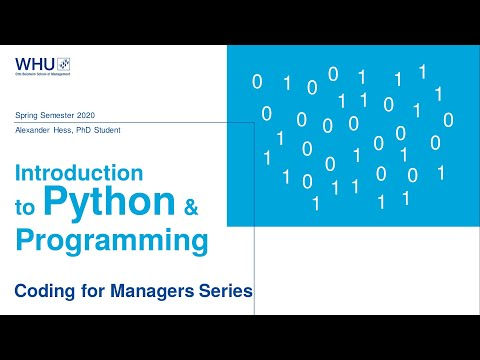

In [237]:
from IPython.display import YouTubeVideo
YouTubeVideo("vbp0svA35TE", width="60%")

Next, we list some conference talks that go into great detail regarding the workings of the `dict` type.

[Brandon Rhodes](https://github.com/brandon-rhodes) explains in great detail in his PyCon 2010 & 2017 talks how dictionaries work "under the hood."

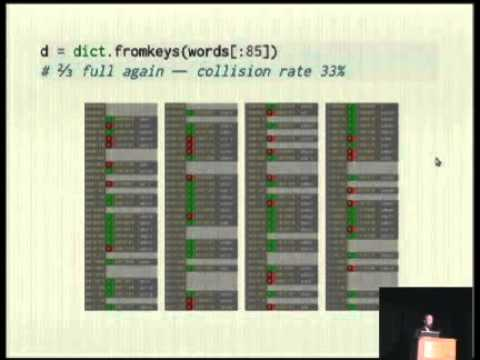

In [238]:
YouTubeVideo("C4Kc8xzcA68", width="60%")

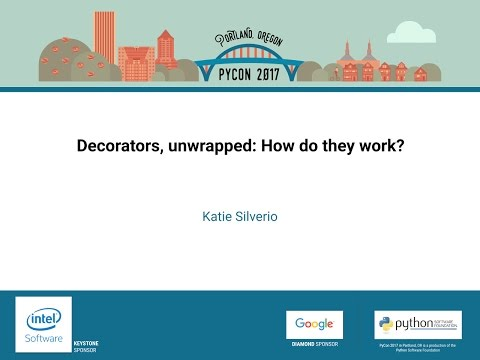

In [239]:
YouTubeVideo("66P5FMkWoVU", width="60%")

The `dict` type's order has been worked on with many PEPs in recent years:
- [PEP 412 <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/dev/peps/pep-0412/): Key-Sharing Dictionary
- [PEP 468 <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/dev/peps/pep-0468/): Preserving the order of \*\*kwargs in a function
- [PEP 520 <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/dev/peps/pep-0520/): Preserving Class Attribute Definition Order

[Raymond Hettinger](https://github.com/rhettinger), a Python core developer and one of the greatest Python teachers in the world, summaries the history of the `dict` type in his PyCon 2017 talk.

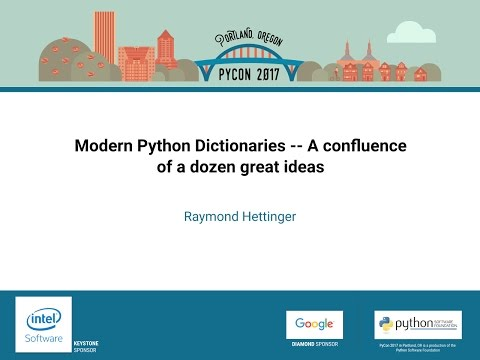

In [240]:
YouTubeVideo("npw4s1QTmPg", width="60%")